In [224]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('movies.csv')

In [226]:
# Now let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [231]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


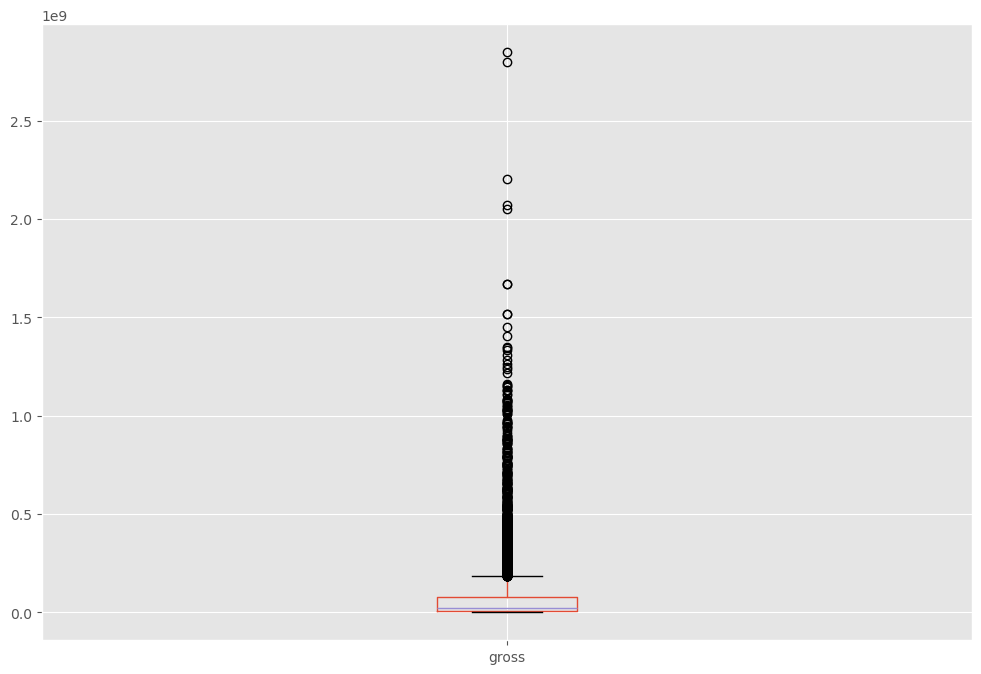

In [236]:
# Are there any Outliers?

df.boxplot(column = ['gross'])
plt.show()

In [238]:
df.drop_duplicates(inplace = True)

In [242]:
# Missing Valy
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [245]:
# Filling NaN values with the median of the column

df['budget'] = df['budget'].fillna(df['budget'].median())

In [247]:
# Drops any rows that contain NaN values

df = df.dropna()

In [250]:
# After dealing with NaN Values
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [254]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [257]:
# Change dataType of columns
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')


In [259]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [262]:
# Order our Data a little bit to see

df.sort_values(by = ['gross'], ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,20500000,1672,Polygram Filmed Entertainment,87.0
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,20500000,1605,Balboa Entertainment,110.0
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0


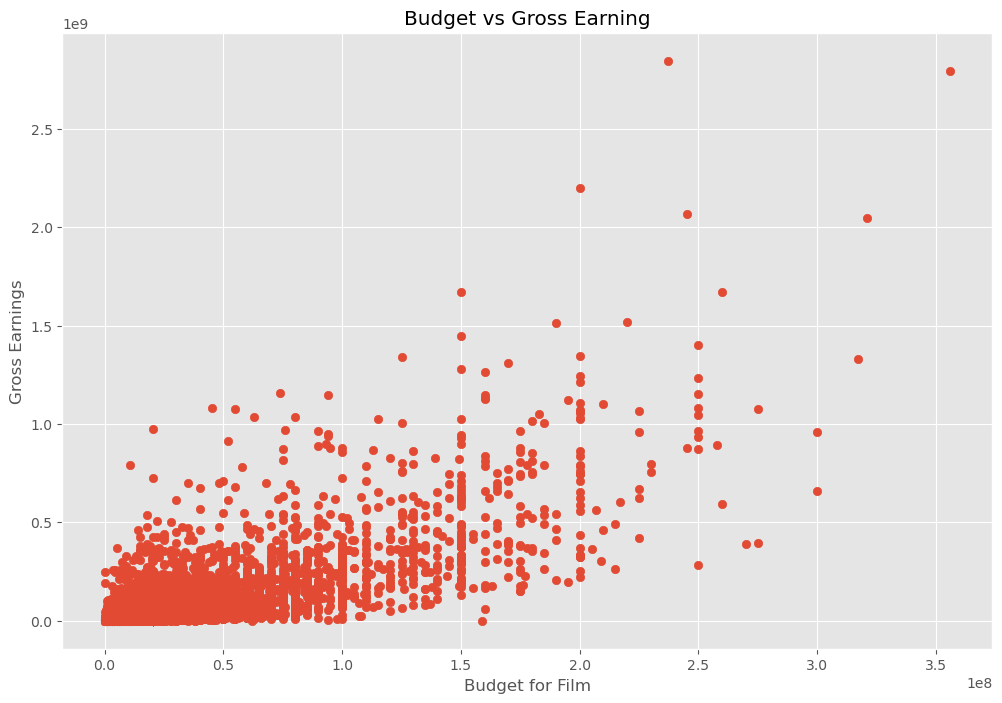

In [277]:
plt.scatter(x =df['budget'], y =df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

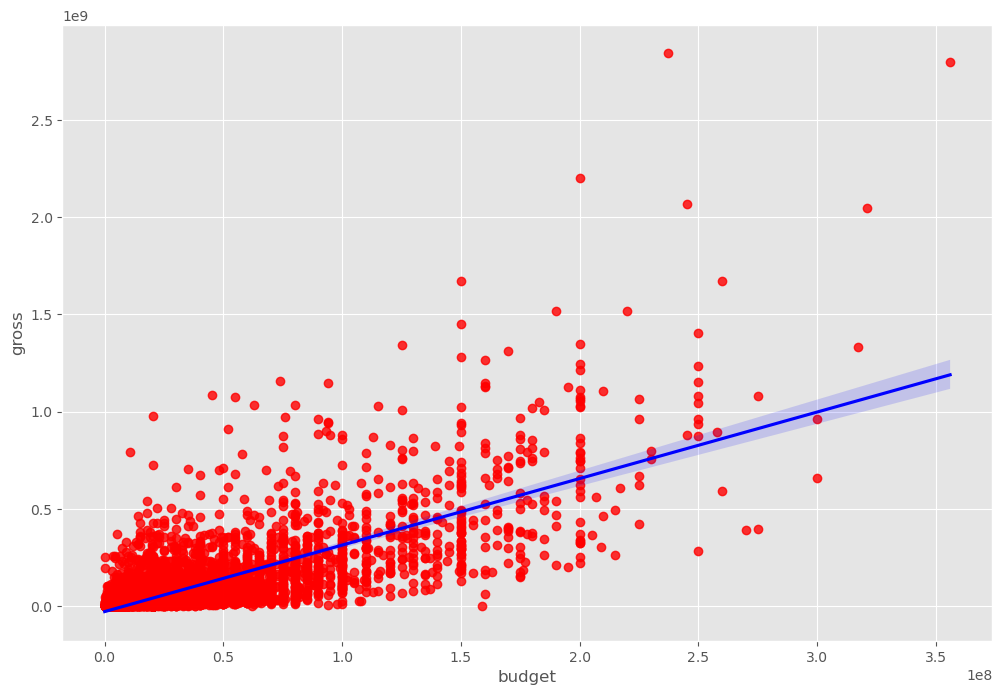

In [281]:
# Plot the Budget vs Gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.show()

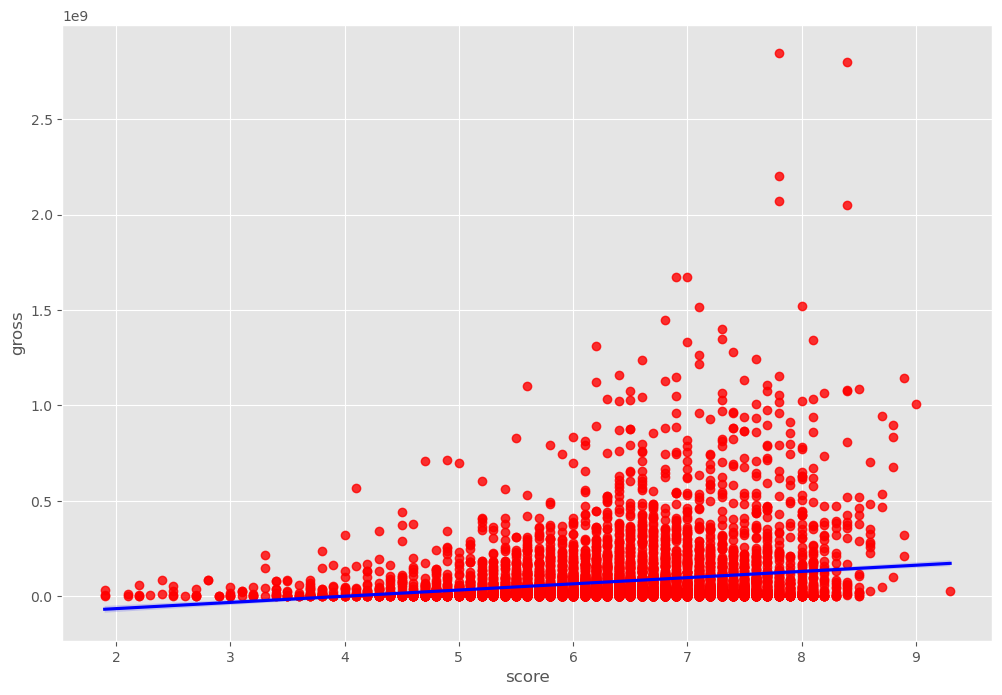

In [318]:
sns.regplot(x="score", y="gross", data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.show()

In [295]:
# Correlation Matrix between all numeric columns

df.corr(numeric_only = True, method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.093951,0.218941,0.291987,0.258826,0.114237
score,0.093951,1.000000,0.415190,0.058978,0.188071,0.397226
votes,0.218941,0.415190,1.000000,0.457769,0.631110,0.309945
budget,0.291987,0.058978,0.457769,1.000000,0.746065,0.273731
gross,0.258826,0.188071,0.631110,0.746065,1.000000,0.245117
runtime,0.114237,0.397226,0.309945,0.273731,0.245117,1.000000


In [308]:
df.corr(numeric_only = True, method = 'kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.065343,0.326025,0.186227,0.203384,0.090236
score,0.065343,1.000000,0.304754,-0.006426,0.088522,0.282388
votes,0.326025,0.304754,1.000000,0.272338,0.549336,0.191732
budget,0.186227,-0.006426,0.272338,1.000000,0.383919,0.192130
gross,0.203384,0.088522,0.549336,0.383919,1.000000,0.169083
runtime,0.090236,0.282388,0.191732,0.192130,0.169083,1.000000


In [312]:
df.corr(numeric_only= True, method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.095848,0.465166,0.259804,0.297499,0.133069
score,0.095848,1.000000,0.434803,-0.009614,0.129759,0.398280
votes,0.465166,0.434803,1.000000,0.386938,0.743122,0.281526
budget,0.259804,-0.009614,0.386938,1.000000,0.530989,0.271107
gross,0.297499,0.129759,0.743122,0.530989,1.000000,0.246503
runtime,0.133069,0.398280,0.281526,0.271107,0.246503,1.000000


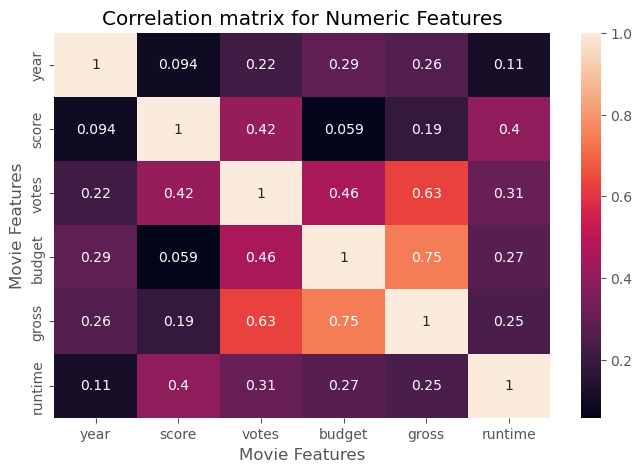

In [338]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [373]:
# Using .factorize()
# Encode categorical values in each column of the DataFrame into unique integer codes
# and compute the correlation matrix using Pearson's method.

encoded_correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method = 'pearson')
encoded_correlation_matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.146414,0.030281,0.964746,0.958840,-0.040444,0.283260,0.742323,0.801330,0.727983,0.148992,0.275936,0.964776,0.592357,0.045947
rating,0.146414,1.000000,-0.083557,0.159679,0.148439,0.013357,0.105346,0.091372,0.110643,0.101151,0.019739,0.189812,0.156428,-0.019134,0.038469
genre,0.030281,-0.083557,1.000000,0.032063,0.030674,-0.009702,0.020944,0.041438,0.030915,0.032209,-0.019693,0.058459,0.032602,0.004804,0.001904
year,0.964746,0.159679,0.032063,1.000000,0.993516,-0.038545,0.308708,0.767312,0.822133,0.753331,0.145947,0.299901,0.998846,0.601908,0.048354
released,0.958840,0.148439,0.030674,0.993516,1.000000,-0.039191,0.295305,0.768401,0.816979,0.752771,0.152993,0.284803,0.994041,0.608885,0.044707
score,-0.040444,0.013357,-0.009702,-0.038545,-0.039191,1.000000,-0.000879,-0.020058,-0.030064,-0.002816,0.038228,-0.010389,-0.037128,-0.020372,0.034295
votes,0.283260,0.105346,0.020944,0.308708,0.295305,-0.000879,1.000000,0.178643,0.215097,0.167985,-0.046664,0.399726,0.295239,-0.003643,0.113626
director,0.742323,0.091372,0.041438,0.767312,0.768401,-0.020058,0.178643,1.000000,0.746847,0.678961,0.163625,0.104913,0.769451,0.551646,-0.017734
writer,0.801330,0.110643,0.030915,0.822133,0.816979,-0.030064,0.215097,0.746847,1.000000,0.672856,0.167228,0.185326,0.822564,0.546044,0.029178
star,0.727983,0.101151,0.032209,0.753331,0.752771,-0.002816,0.167985,0.678961,0.672856,1.000000,0.187301,0.109125,0.754470,0.527795,0.031680


In [375]:
# Using .cat.codes
# Convert object-type columns to categorical and replace them with integer codes.

df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtypes == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.010815,0.018363,0.008987,-0.010012,0.014970,0.011462,0.010575,0.009451,0.006731,-0.012544,0.019929,0.005135,0.008529,0.009563
rating,-0.010815,1.000000,0.118600,0.025950,0.024188,0.018596,0.016485,0.013653,-0.003234,0.002255,0.033607,-0.148634,-0.131786,-0.083083,0.072340
genre,0.018363,0.118600,1.000000,-0.084892,0.027639,0.045478,-0.148120,-0.015227,0.009340,-0.001158,-0.029208,-0.337884,-0.242597,-0.071590,-0.040939
year,0.008987,0.025950,-0.084892,1.000000,0.001440,0.093951,0.218941,-0.021394,-0.011853,-0.031476,-0.080122,0.291987,0.258826,-0.015880,0.114237
released,-0.010012,0.024188,0.027639,0.001440,1.000000,0.044469,0.018211,-0.003460,-0.004121,0.017597,-0.020491,0.014307,0.001084,-0.006299,-0.000472
score,0.014970,0.018596,0.045478,0.093951,0.044469,1.000000,0.415190,0.008358,0.019710,-0.001386,-0.126497,0.058978,0.188071,-0.000342,0.397226
votes,0.011462,0.016485,-0.148120,0.218941,0.018211,0.415190,1.000000,0.000260,0.000323,-0.022542,0.066907,0.457769,0.631110,0.128127,0.309945
director,0.010575,0.013653,-0.015227,-0.021394,-0.003460,0.008358,0.000260,1.000000,0.297126,0.036188,0.012726,-0.002199,-0.014296,0.001379,0.015713
writer,0.009451,-0.003234,0.009340,-0.011853,-0.004121,0.019710,0.000323,0.297126,1.000000,0.024161,0.012415,-0.031085,-0.024021,0.003462,-0.004668
star,0.006731,0.002255,-0.001158,-0.031476,0.017597,-0.001386,-0.022542,0.036188,0.024161,1.000000,-0.018838,-0.020853,-0.002451,0.005417,0.007827


In [379]:
# Using .cat.codes for efficient encoding of categorical data into integer codes,
# as it preserves the relationships between numeric data and avoids altering correlation values.

df_numerized.corr(method = 'pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.010815,0.018363,0.008987,-0.010012,0.014970,0.011462,0.010575,0.009451,0.006731,-0.012544,0.019929,0.005135,0.008529,0.009563
rating,-0.010815,1.000000,0.118600,0.025950,0.024188,0.018596,0.016485,0.013653,-0.003234,0.002255,0.033607,-0.148634,-0.131786,-0.083083,0.072340
genre,0.018363,0.118600,1.000000,-0.084892,0.027639,0.045478,-0.148120,-0.015227,0.009340,-0.001158,-0.029208,-0.337884,-0.242597,-0.071590,-0.040939
year,0.008987,0.025950,-0.084892,1.000000,0.001440,0.093951,0.218941,-0.021394,-0.011853,-0.031476,-0.080122,0.291987,0.258826,-0.015880,0.114237
released,-0.010012,0.024188,0.027639,0.001440,1.000000,0.044469,0.018211,-0.003460,-0.004121,0.017597,-0.020491,0.014307,0.001084,-0.006299,-0.000472
score,0.014970,0.018596,0.045478,0.093951,0.044469,1.000000,0.415190,0.008358,0.019710,-0.001386,-0.126497,0.058978,0.188071,-0.000342,0.397226
votes,0.011462,0.016485,-0.148120,0.218941,0.018211,0.415190,1.000000,0.000260,0.000323,-0.022542,0.066907,0.457769,0.631110,0.128127,0.309945
director,0.010575,0.013653,-0.015227,-0.021394,-0.003460,0.008358,0.000260,1.000000,0.297126,0.036188,0.012726,-0.002199,-0.014296,0.001379,0.015713
writer,0.009451,-0.003234,0.009340,-0.011853,-0.004121,0.019710,0.000323,0.297126,1.000000,0.024161,0.012415,-0.031085,-0.024021,0.003462,-0.004668
star,0.006731,0.002255,-0.001158,-0.031476,0.017597,-0.001386,-0.022542,0.036188,0.024161,1.000000,-0.018838,-0.020853,-0.002451,0.005417,0.007827


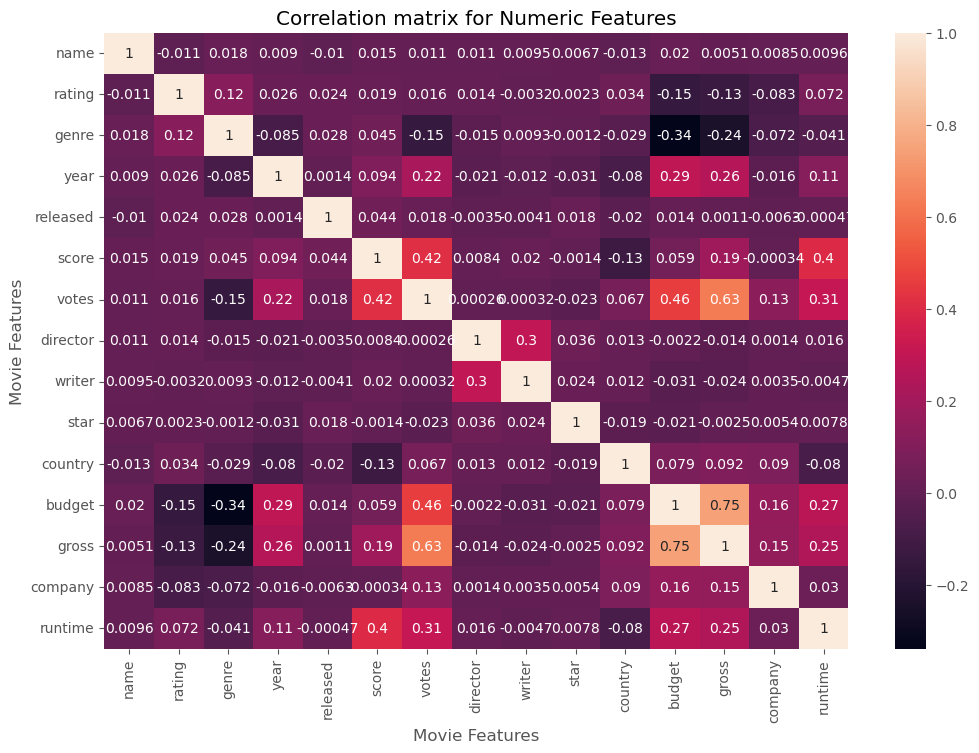

In [383]:
correlation_matrix = df_numerized.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [394]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.010815
          genre       0.018363
          year        0.008987
          released   -0.010012
          score       0.014970
          votes       0.011462
          director    0.010575
          writer      0.009451
          star        0.006731
          country    -0.012544
          budget      0.019929
          gross       0.005135
          company     0.008529
          runtime     0.009563
rating    name       -0.010815
          rating      1.000000
          genre       0.118600
          year        0.025950
          released    0.024188
          score       0.018596
          votes       0.016485
          director    0.013653
          writer     -0.003234
          star        0.002255
          country     0.033607
          budget     -0.148634
          gross      -0.131786
          company    -0.083083
          runtime     0.072340
genre     name        0.018363
          rating      0.118600
        

In [406]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre     budget     -0.337884
budget    genre      -0.337884
genre     gross      -0.242597
gross     genre      -0.242597
rating    budget     -0.148634
budget    rating     -0.148634
genre     votes      -0.148120
votes     genre      -0.148120
gross     rating     -0.131786
rating    gross      -0.131786
score     country    -0.126497
country   score      -0.126497
genre     year       -0.084892
year      genre      -0.084892
company   rating     -0.083083
rating    company    -0.083083
year      country    -0.080122
country   year       -0.080122
runtime   country    -0.079525
country   runtime    -0.079525
company   genre      -0.071590
genre     company    -0.071590
          runtime    -0.040939
runtime   genre      -0.040939
star      year       -0.031476
year      star       -0.031476
budget    writer     -0.031085
writer    budget     -0.031085
country   genre      -0.029208
genre     country    -0.029208
writer    gross      -0.024021
gross     writer     -0.024021
star    

In [412]:
high_corr = sorted_pairs[sorted_pairs > 0.4]
high_corr

score     votes       0.415190
votes     score       0.415190
budget    votes       0.457769
votes     budget      0.457769
gross     votes       0.631110
votes     gross       0.631110
budget    gross       0.746065
gross     budget      0.746065
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64